#Introduction:

This report provides a comprehensive analysis of user behavior on a website using various analytical methods such as K-Means clustering, univariate and bivariate analysis, and A/B testing. The goal is to segment users based on their engagement with the site, uncover traffic patterns, and identify actionable insights to improve user retention, engagement, and conversions. Key metrics such as ExitRates, BounceRates, ProductRelated_Duration, Traffic Type, Visitor Type, and Revenue Conversion are explored. Additionally, A/B testing is conducted to evaluate two versions of the website and determine which one better enhances user experience and retention.

#Data Summary

The dataset contains several features related to online shopper behavior, including:

####Numerical features:
Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, and SpecialDay.
####Categorical features:
Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend, and Revenue.

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the Dataset
data = pd.read_csv('online_shoppers_intention.csv')

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Checking for missing values
data.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


#Exploratory Data Analysis
##Univariate Analysis
###Analyze each feature (column of a DataFrame) and try to uncover the pattern or distribution of the data


###Traffic Type Column

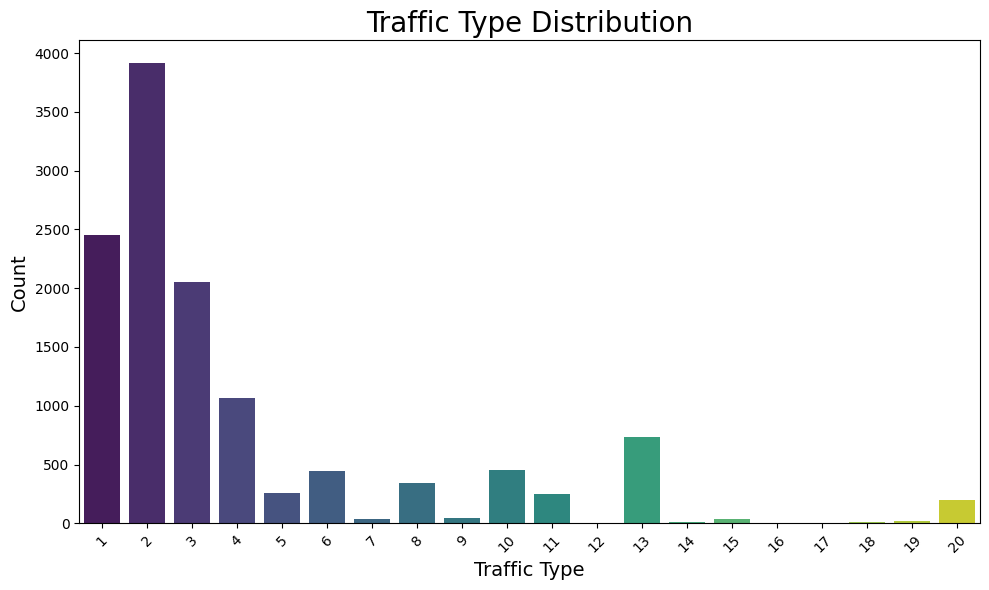

In [ ]:
#Traffic Type Column
#Analyze Traffic Type Column is to determine what amount of site traffic is accounted for by direct visitors
# Create the count plot for TrafficType
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='TrafficType', data=data, palette='viridis')

# Add labels and title
plt.title('Traffic Type Distribution', fontsize=20)
plt.xlabel('Traffic Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-ticks for better readability (if there are many categories)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data['TrafficType'].value_counts(normalize=True)

,proportion
TrafficType,
2,0.317356
1,0.198783
3,0.166423
4,0.086699
13,0.059854
10,0.036496
6,0.036010
8,0.027818
5,0.021087


*We can see that Traffic Type 2 has the highest number and Traffic Type 2, 1, 3, and 4 account for the majority of the web traffic*.

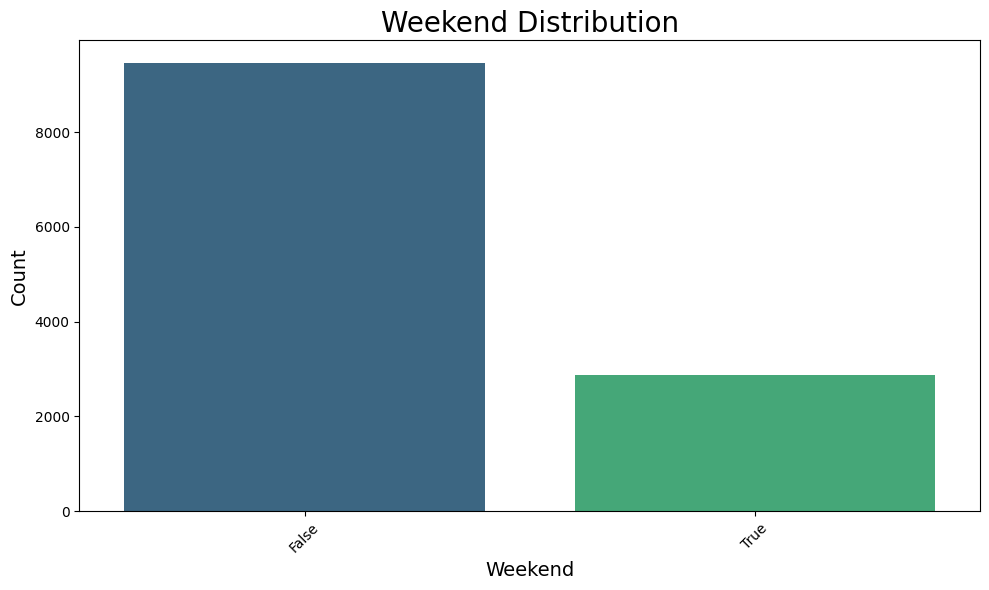

In [ ]:
# Create the count plot for Weekend
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='Weekend', data=data, palette='viridis')

# Add labels and title
plt.title('Weekend Distribution', fontsize=20)
plt.xlabel('Weekend', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-ticks for better readability (if there are many categories)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data['Weekend'].value_counts()

,count
Weekend,
False,9462
True,2868


In [ ]:
data['Weekend'].value_counts(normalize=True)

,proportion
Weekend,
False,0.767397
True,0.232603


*From the above results, we can see that more customers visit during weekdays than weekend days*

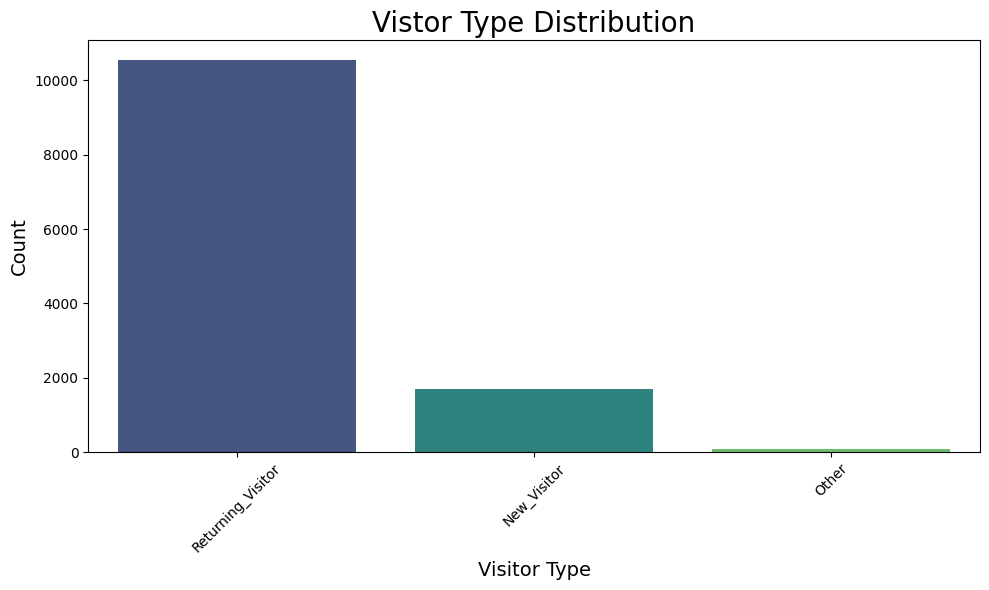

In [ ]:
#Visitor Type Column: Analyze Visitor Type Column is to determine which visitor type is most frequent (New_Visitor, Returning_Visitor, or Others)
# Create the count plot for Visitor Type
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='VisitorType', data=data, palette='viridis')

# Add labels and title
plt.title('Vistor Type Distribution', fontsize=20)
plt.xlabel('Visitor Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-ticks for better readability (if there are many categories)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data['VisitorType'].value_counts()

,count
VisitorType,
Returning_Visitor,10551
New_Visitor,1694
Other,85


In [ ]:
data['VisitorType'].value_counts(normalize=True)

,proportion
VisitorType,
Returning_Visitor,0.855718
New_Visitor,0.137388
Other,0.006894


*From the results above, we can see that the number of returning customers is higher than that of new visitors and other. It means the website is attracted by customers and they came back again. This is a good signal*.

##The Revenue Column: Baseline Conversion Rate

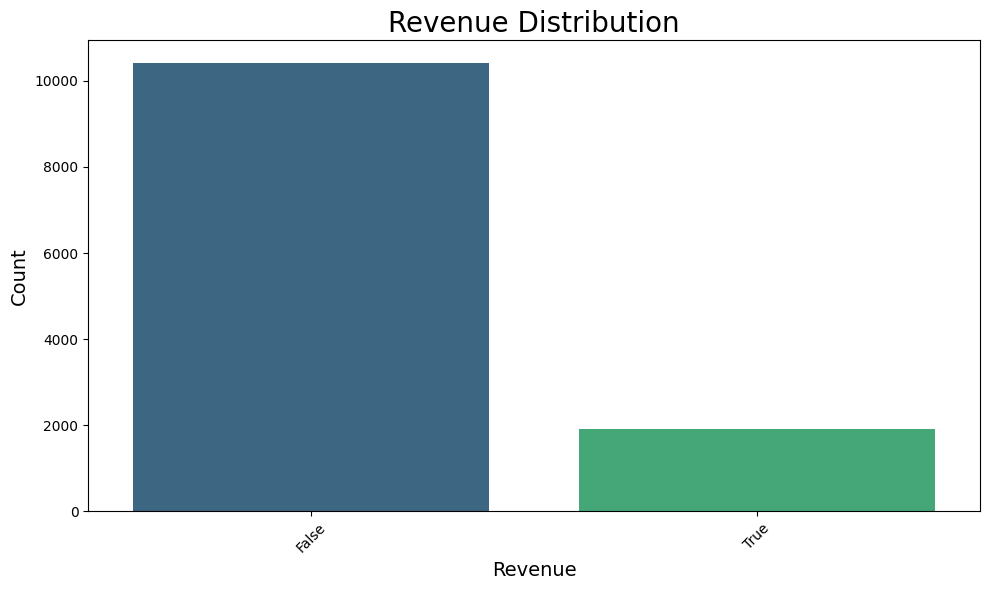

In [ ]:
# Create the count plot for Revenue
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='Revenue', data=data, palette='viridis')

# Add labels and title
plt.title('Revenue Distribution', fontsize=20)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-ticks for better readability (if there are many categories)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data['Revenue'].value_counts()

,count
Revenue,
False,10422
True,1908


In [ ]:
data['Revenue'].value_counts(normalize=True)

,proportion
Revenue,
False,0.845255
True,0.154745


*From the results above, we can see that False has a higher number count than True. There are 1,908 customers making a purchase while 10,422 customers didn't make a purchase*.

In [ ]:
print ('Therefore, the coversion rate is', 1908/12330 * 100,'%')

Therefore, the coversion rate is 15.474452554744525 %


##Region column

###Analyze Region columns is to see which region has the highest number of customers visiting the website

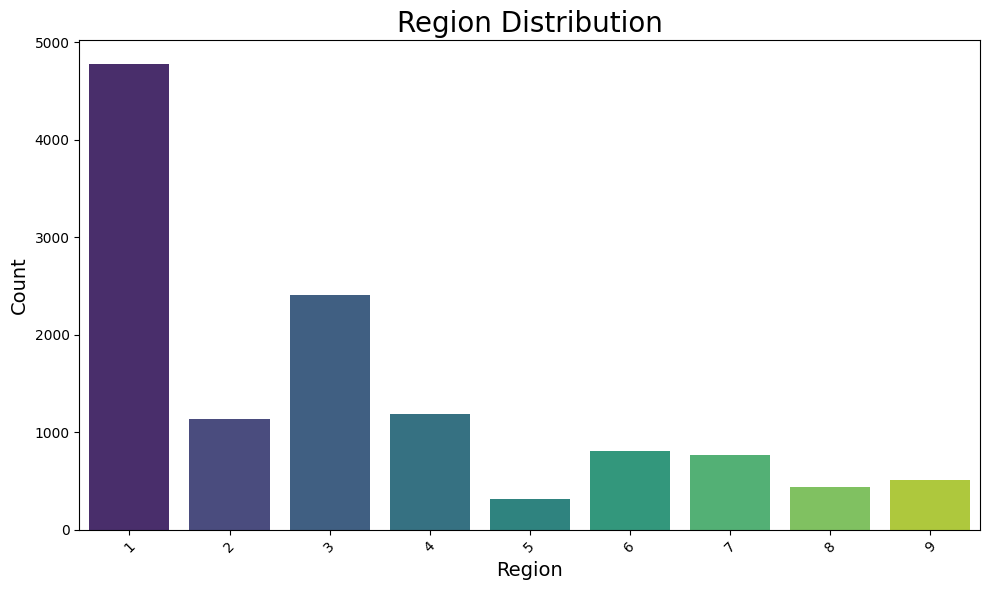

In [ ]:
# Create the count plot for Region
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='Region', data=data, palette='viridis')

# Add labels and title
plt.title('Region Distribution', fontsize=20)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-ticks for better readability (if there are many categories)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data['Region'].value_counts()

,count
Region,
1,4780
3,2403
4,1182
2,1136
6,805
7,761
9,511
8,434
5,318


In [ ]:
data['Region'].value_counts(normalize=True)

,proportion
Region,
1,0.387672
3,0.194891
4,0.095864
2,0.092133
6,0.065288
7,0.061719
9,0.041444
8,0.035199
5,0.025791


*From the result above, we can see that Region 1 has the highest number of customers visiting the website. And we can see that region 1 and 3 are the most potential area because they account for more than 50% of online sessions*.

##Brownser column

Analyze the Brownser column to determine which type of browser is used by visitors

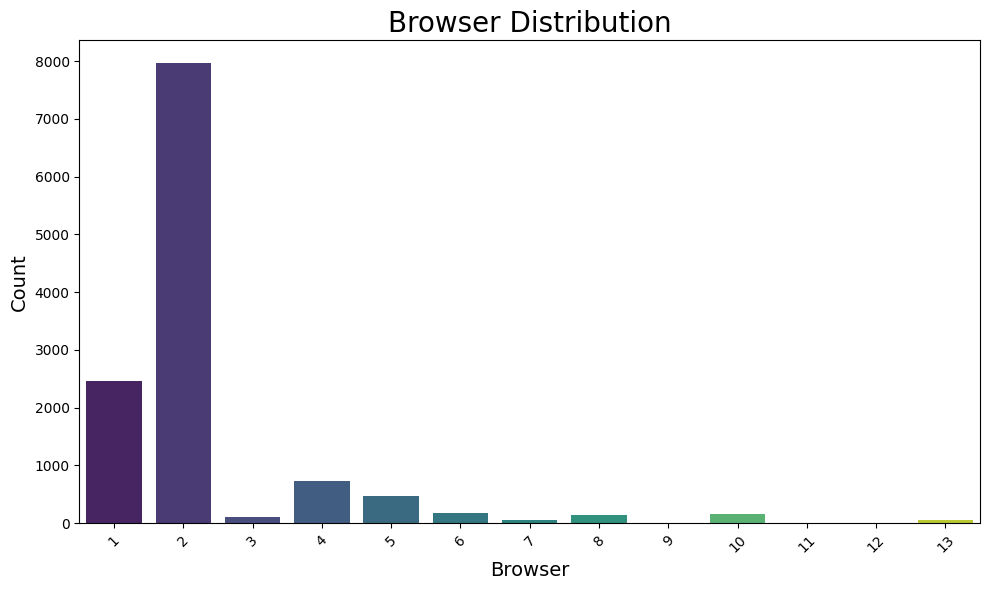

In [ ]:
# Create the count plot for Browser
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='Browser', data=data, palette='viridis')

# Add labels and title
plt.title('Browser Distribution', fontsize=20)
plt.xlabel('Browser', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-ticks for better readability (if there are many categories)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data['Browser'].value_counts()

,count
Browser,
2,7961
1,2462
4,736
5,467
6,174
10,163
8,135
3,105
13,61


In [ ]:
data['Browser'].value_counts(normalize=True)

,proportion
Browser,
2,0.645661
1,0.199676
4,0.059692
5,0.037875
6,0.014112
10,0.013220
8,0.010949
3,0.008516
13,0.004947


*From the result above, we can see that Brownser 2 has the highest number of visitors visiting the website*.

##Operating System column

Analyze Operating System column to determine which Operating System type contributes the most to website traffic

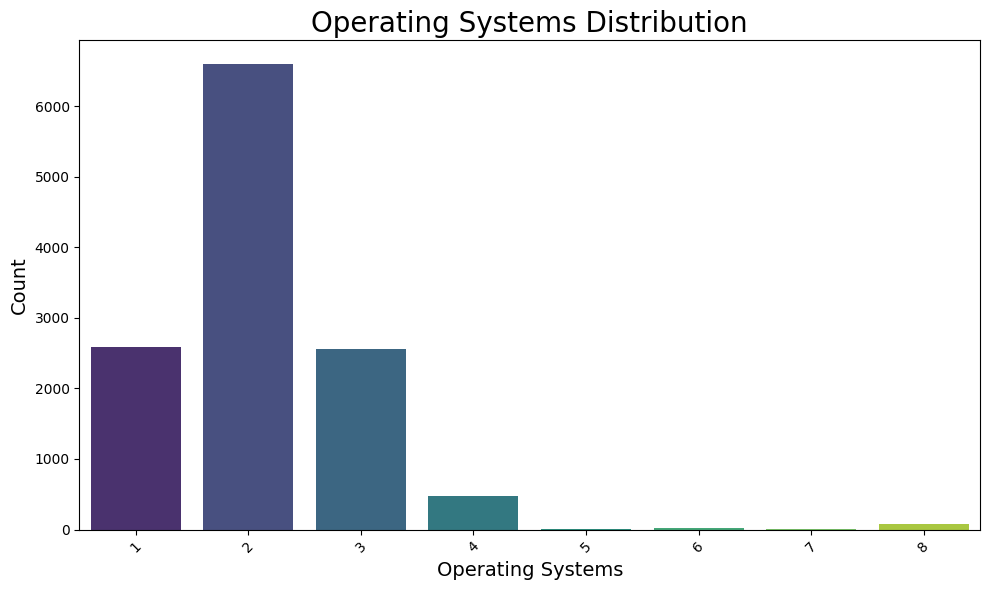

In [ ]:
# Create the count plot for OperatingSystems
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='OperatingSystems', data=data, palette='viridis')

# Add labels and title
plt.title('Operating Systems Distribution', fontsize=20)
plt.xlabel('Operating Systems', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-ticks for better readability (if there are many categories)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data['OperatingSystems'].value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
4,478
8,79
6,19
7,7
5,6


In [ ]:
data['OperatingSystems'].value_counts(normalize = True)

,proportion
OperatingSystems,
2,0.535361
1,0.209651
3,0.207218
4,0.038767
8,0.006407
6,0.001541
7,0.000568
5,0.000487


*From the result above, we can see that Operating System 2 contributes the most to the website traffic*

##Administrative column

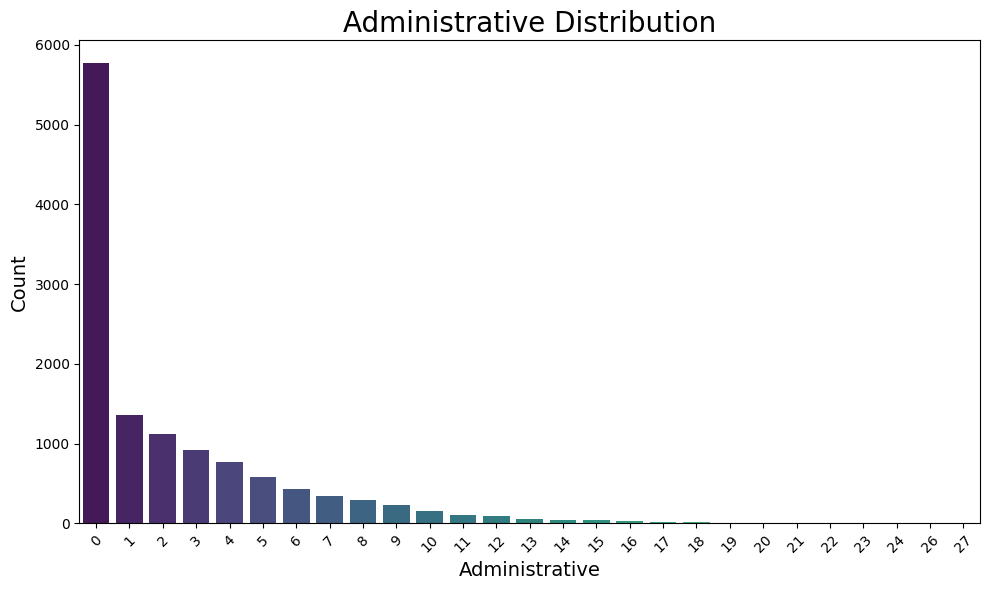

In [ ]:
# Create the count plot for Administrative
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='Administrative', data=data, palette='viridis')

# Add labels and title
plt.title('Administrative Distribution', fontsize=20)
plt.xlabel('Administrative', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-ticks for better readability (if there are many categories)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

*Administrative pages on a website where the content is being added to the site. We can see that visitors tend to visit page 0 the most frequently*.

##Informational column

*The information pages of a site are the pages where the direct information is presented*

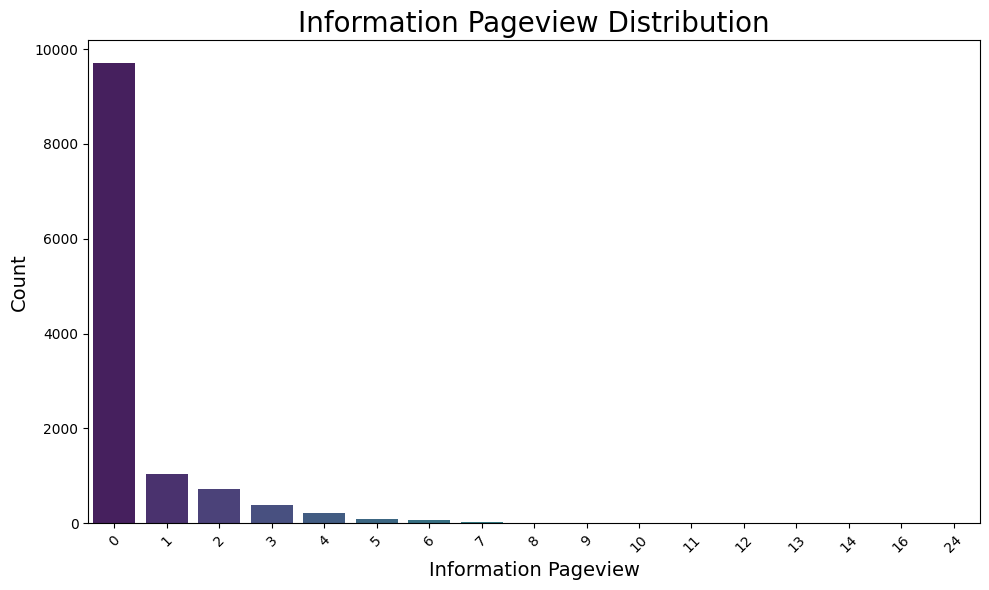

In [ ]:
# Create the count plot for Information Pageview
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='Informational', data=data, palette='viridis')

# Add labels and title
plt.title('Information Pageview Distribution', fontsize=20)
plt.xlabel('Information Pageview', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-ticks for better readability (if there are many categories)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data['Informational'].value_counts(normalize=True)

,proportion
Informational,
0,0.786618
1,0.084428
2,0.059043
3,0.030819
4,0.018005
5,0.008029
6,0.006326
7,0.002920
9,0.001217


*From the result above, we can see that Information page 0 has the highest number of visitors. And 79% of users are visiting pages 0 and 1*.

##Special Day column


Analyze Special Day to know whether special days (Valentine's Day) impact the number of visitors visiting the website.

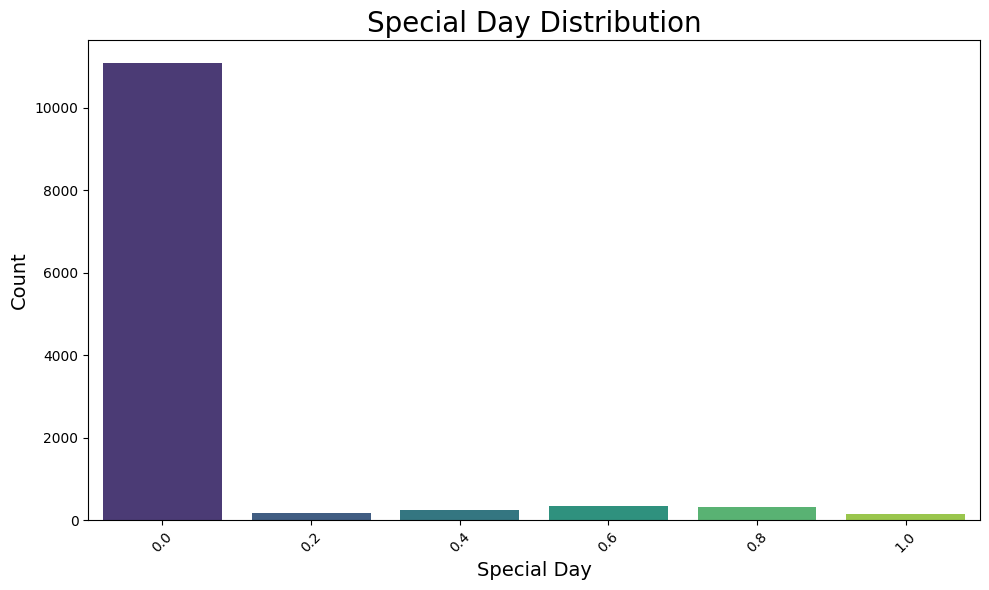

In [ ]:
# Create the count plot for Special Day
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='SpecialDay', data=data, palette='viridis')

# Add labels and title
plt.title('Special Day Distribution', fontsize=20)
plt.xlabel('Special Day', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-ticks for better readability (if there are many categories)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
data['SpecialDay'].value_counts(normalize=True)

,proportion
SpecialDay,
0.0,0.898540
0.6,0.028467
0.8,0.026358
0.4,0.019708
0.2,0.014436
1.0,0.012490


*From the result above, we can see that special days have no impact on the number of visitors to the website*.

#Bivariate Analysis

##Bivariate analysis is performed between two variables to look at their relationship. Firstly, analyze the realtionship between Revenue with other variables.

###Revenue Versus Visitor Type

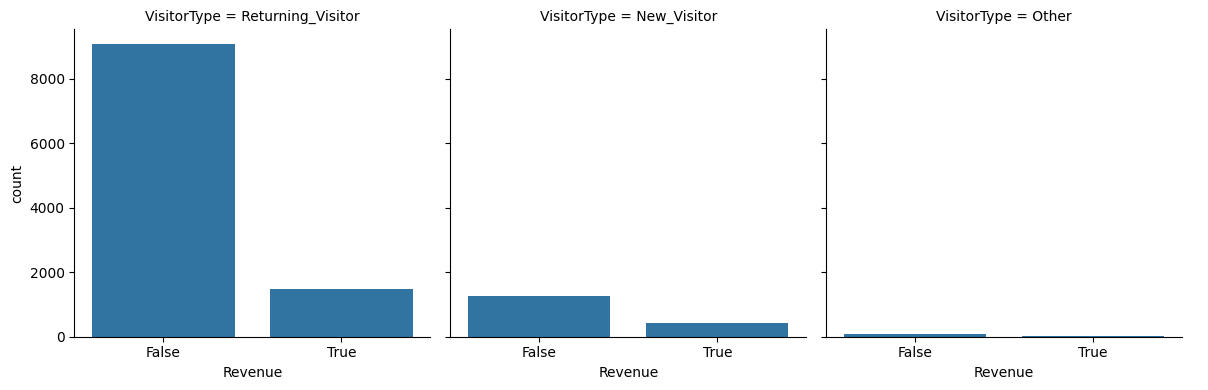

In [ ]:
# Create a catplot with explicit x and col arguments
a = sns.catplot(x="Revenue", col="VisitorType", col_wrap=3,
                data=data, kind="count", height=4, aspect=1)

# Display the plot
plt.show()


*From the chart above, we can see more revenue is for returning_visitor than new_visitor and others. Thus, we need to think about how to attract new customers to make the purchase*.

###Revenue Versus Traffic Type

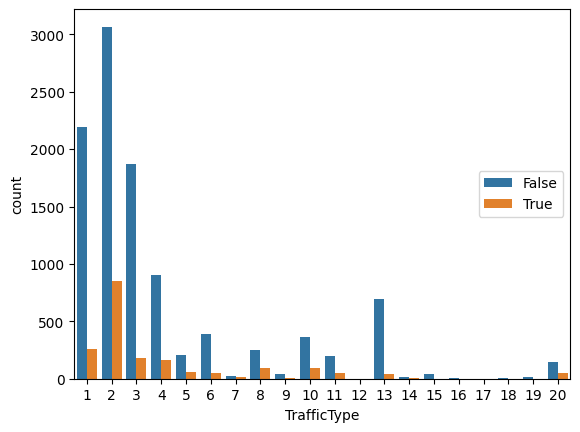

In [ ]:
sns.countplot(x="TrafficType", hue="Revenue", data=data)
plt.legend(loc='right')
plt.show()

*From the plot, we can see that more revenue conversion is for web traffic generated from source 2 then source 1*.

###Revenue versus Region

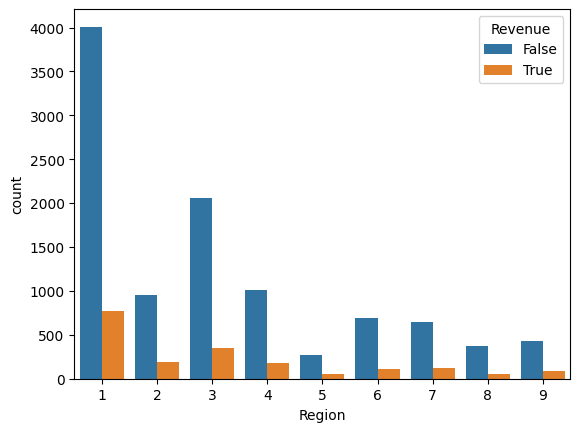

In [ ]:
sns.countplot(x="Region", hue="Revenue", data=data)
plt.show()

*From the plot, we can see that region 1 accounts for most Revenue, and then region 3 the second most*.

###Revenue versus Browser

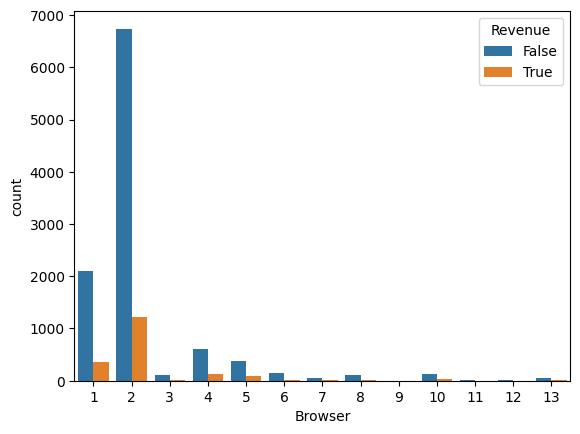

In [ ]:
sns.countplot(x="Browser", hue="Revenue", data=data)
plt.show()

*From the plot, we can see that the most Revenue was generated from Browser 2 and then Browser 1*.

###Revenue versus OperatingSystems

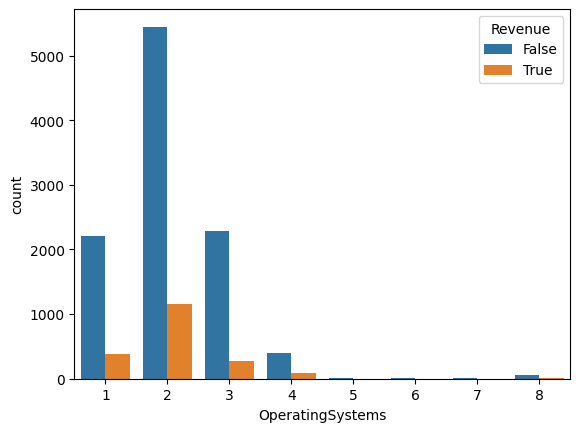

In [ ]:
sns.countplot(x="OperatingSystems", hue="Revenue", data=data)
plt.show()

*We can see, the most happened with Operating System 2 than the other types*.

###Revenue versus Months

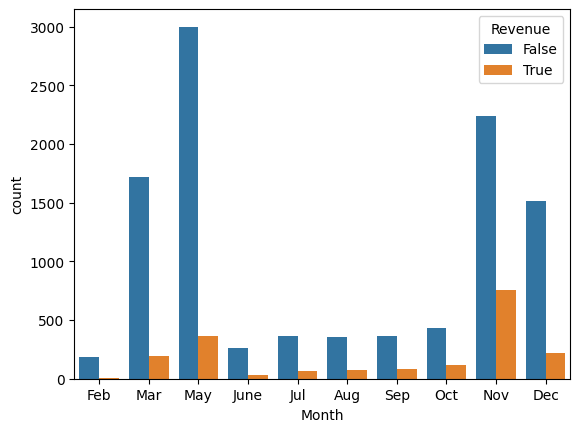

In [ ]:
sns.countplot(x="Month", hue="Revenue",\
              data=data,order=['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

*We can see the most visitors happened in May but the most number of purchases happened in November*.

#Key Insides:

Through univariate and bivariate analysis, we identified several key patterns
Traffic Type: Traffic Type 2 accounts for the highest number of visitors, followed by Types 1, 3, and 4. These four traffic types contribute the majority of the website’s overall traffic.

Weekend Visits: The majority of website visitors come during weekdays, with fewer visits observed on weekends.

Visitor Type: Returning customers outnumber new visitors, indicating that the website is successful in retaining customers, which is a positive indicator for user satisfaction and engagement.

Revenue Conversion: Out of 12,330 visitors, only 1,908 made a purchase, leading to a conversion rate of 15.47%. While this rate is reasonable, there is room for improvement in converting more visitors into paying customers.

Geographical Patterns:

Region 1 has the highest number of visitors, followed by Region 3. Together, these two regions account for over 50% of the total website traffic, making them high-potential markets.
Region 1 also generates the highest revenue, followed by Region 3.
Browser Usage: Browser 2 is the most popular among visitors, followed closely by Browser 1. These insights could be used for optimizing the website’s performance for these specific browsers.

Operating Systems: Operating System 2 is the primary driver of traffic, indicating that the website should ensure its compatibility and user experience is optimized for this OS.

Page Visits:

Visitors frequently access Administrative pages, particularly page 0, indicating that content related to these pages is highly visited.
Most users (79%) visit Information pages 0 and 1, suggesting that users tend to explore only a small portion of the informational content available on the website.
Special Days: Special Days show no significant impact on overall visitor numbers, indicating that the website’s traffic does not vary much around special occasions.

Revenue and Traffic Sources:

The majority of revenue is generated from Traffic Source 2, followed by Source 1. Efforts to strengthen these traffic channels can further improve revenue.
Operating System 2 is associated with the highest number of purchases, underscoring the importance of focusing on user experience for this OS.
Seasonality and Purchases:

Although May sees the highest number of visitors, the majority of purchases occur in November, suggesting a seasonal trend in purchasing behavior.

#Recommendations:
Focus marketing efforts on Traffic Source 2 and Regions 1 and 3, as they are the most profitable.
Enhance the website’s user experience on Browser 2 and Operating System 2 to maximize traffic and conversions.
Develop strategies to increase conversion rates, particularly during high-traffic months like May, by offering promotions or improving the checkout process.
Continue to engage returning customers while implementing strategies to convert more new visitors into buyers.

#Cluster Analysis - K-means

Encode Categorical Variables

In [ ]:
#Encode Categorical Variables using One-Hot Encoding for nominal categories
# Identify categorical columns
categorical_cols = ['Month', 'VisitorType', 'Weekend']

# One-Hot Encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded data
data_encoded.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,False,False,False,False,False,False,False,False,True,True


In [ ]:
#Clustering
# Drop the target variable
features = data_encoded.drop('Revenue', axis=1)

In [ ]:
#Scale Numerical Features
# Identify numerical columns
numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational',
                  'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                  'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                  'OperatingSystems', 'Browser', 'Region', 'TrafficType']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
features_scaled = scaler.fit_transform(features[numerical_cols])

# Convert the scaled features back to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=numerical_cols)

# If you have additional encoded categorical features, concatenate them
categorical_encoded_cols = [col for col in features.columns if col not in numerical_cols]
features_final = pd.concat([features_scaled_df, features[categorical_encoded_cols].reset_index(drop=True)], axis=1)

# Display the first few rows of the final feature set
features_final.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,True,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,True,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,True,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,True,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,False,False,False,False,False,False,False,False,True,True


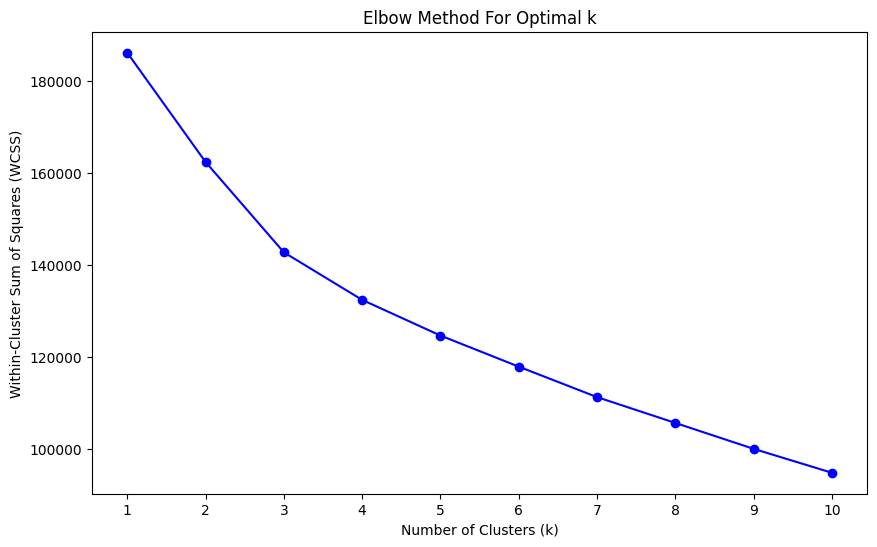

In [ ]:
#Determine the Optimal Number of Clusters Using the Elbow Method
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_final)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

# Plot the Elbow Graph
plt.figure(figsize=(10,6))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.show()


In [ ]:
# Interpret the Elbow Plot
optimal_k = 3
print(f"The optimal number of clusters is: {optimal_k}")


The optimal number of clusters is: 3


Apply K-Means Clustering with
𝐾
=
3


In [ ]:
# Apply K-Means Clustering with the Optimal Number of Clusters
# Initialize K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model
kmeans.fit(features_final)

# Assign cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Display the first few rows with cluster assignments
data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


In [ ]:
# Select only numeric columns for cluster analysis
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Group by 'Cluster' and calculate the mean of numeric features
cluster_summary = data.groupby('Cluster')[numeric_cols].mean()

# Display the summary of each cluster's characteristics
cluster_summary


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Cluster,,,,,,,,,,,,,,
0,1.714789,51.504943,0.215359,8.108739,23.944036,876.518406,0.009116,0.032034,5.897452,0.061354,2.119909,2.384703,3.196393,4.047259
1,0.049103,1.408750,0.016053,0.091785,3.116147,58.362493,0.165694,0.179867,0.000000,0.111615,2.178470,2.318225,3.051936,5.014164
2,7.366215,307.047109,2.536375,213.752309,96.740444,3829.771215,0.006281,0.019430,9.685597,0.029100,2.112824,2.218249,2.918002,3.585697


##Cluster 0 (Moderately Engaged Users):
Administrative: 1.71 (moderate), Administrative Duration: 51.50 seconds - These users occasionally visit administrative sections but don't spend much time there.

Informational: 0.21, Informational Duration: 8.11 seconds – Low engagement with informational content.

ProductRelated: 23.94, ProductRelated Duration: 876.52 seconds – These users explore a significant number of product pages and spend a good amount of time on them.

BounceRates: 0.009 (very low), ExitRates: 0.032 – These users are very engaged, with low bounce and exit rates.

PageValues: 5.90 – Moderate page value, indicating potential for conversion.
SpecialDay: 0.061 – Slightly more engagement during special days.

OperatingSystems, Browser, Region, TrafficType: Around average values, suggesting typical diversity in usage across systems and regions.

*Interpretation: Cluster 0 likely represents moderately engaged users who explore product pages thoroughly and have a good chance of making a purchase. With low bounce rates and moderate page value, these users could be nurtured with personalized recommendations or loyalty programs*.

##Cluster 1 (Low Engagement, High Bounce Users):
Administrative: 0.05, Administrative Duration: 1.41 seconds – Very minimal interaction with administrative sections.

Informational: 0.016, Informational Duration: 0.09 seconds – Little to no interaction with informational content.

ProductRelated: 3.12, ProductRelated Duration: 58.36 seconds – Minimal engagement with product pages.

BounceRates: 0.165 (relatively high), ExitRates: 0.18 – High bounce and exit rates indicate users leave the site quickly.

PageValues: 0 – No page value, meaning these users are not generating revenue.
SpecialDay: 0.111 – Slightly higher engagement during special promotional days.

OperatingSystems, Browser, Region, TrafficType: Similar to other clusters, no distinguishing factors here.

*Interpretation: Cluster 1 represents low-engagement, high-bounce users who visit the site but quickly leave without exploring much or making a purchase. These users may be less interested in the site's content, and efforts should focus on improving user experience, site navigation, or offering more targeted content to capture their interest*.

##Cluster 2 (Highly Engaged, High-Value Users):
Administrative: 7.37, Administrative Duration: 307.05 seconds – These users frequently visit administrative sections and spend significant time there, possibly managing accounts or settings.

Informational: 2.54, Informational Duration: 213.75 seconds – High engagement with informational content (such as FAQs, support).

ProductRelated: 96.74, ProductRelated Duration: 3829.77 seconds – These users explore many product pages and spend considerable time on them.

BounceRates: 0.006 (very low), ExitRates: 0.019 – Extremely low bounce and exit rates, indicating strong engagement.

PageValues: 9.69 – High page value, indicating high potential for conversion or purchases.

SpecialDay: 0.029 – Slightly less engagement during special days compared to other clusters.

OperatingSystems, Browser, Region, TrafficType: Similar distribution to other clusters.

*Interpretation: Cluster 2 represents highly engaged and high-value users. These users frequently explore product pages, engage with informational content, and are likely to make purchases. They could be existing customers managing their accounts or highly interested in the site's offerings. This group should be prioritized for loyalty programs, personalized marketing, and premium offers to maximize their value*.

##Actionable Insights:
####Cluster 0 (Moderately Engaged Users):

Offer personalized product recommendations or discounts to encourage conversion.
These users have potential to make purchases but may need some motivation.

####Cluster 1 (Low Engagement, High Bounce Users):

Improve user experience or navigation to reduce bounce rates.
Provide targeted content (e.g., landing page optimization or personalized product suggestions) to capture attention.

####Cluster 2 (Highly Engaged, High-Value Users):

Focus on retaining these users through loyalty programs, personalized offers, and premium services.
Since they are likely existing customers or high-potential leads, nurture them with follow-up emails or exclusive promotions.

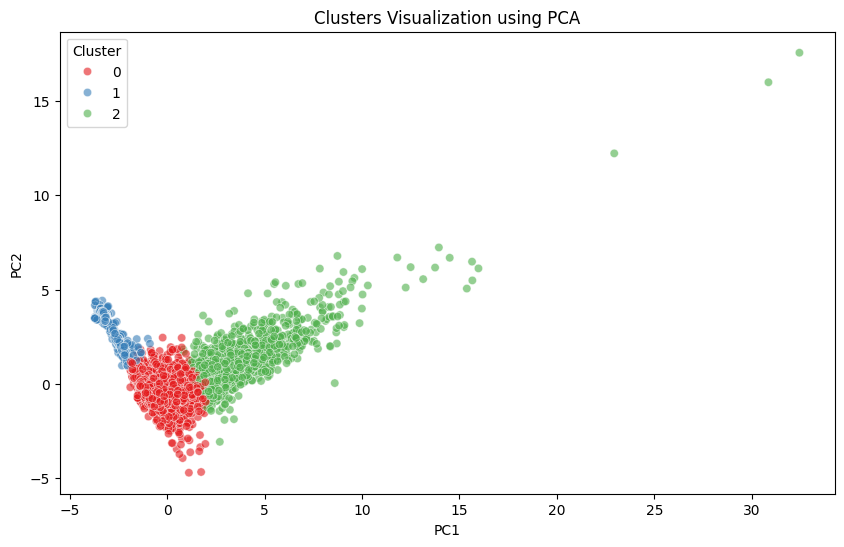

In [ ]:
#Visualize the Clusters
from sklearn.decomposition import PCA

# Initialize PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_final)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data['Cluster']

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', alpha=0.6)
plt.title('Clusters Visualization using PCA')
plt.show()


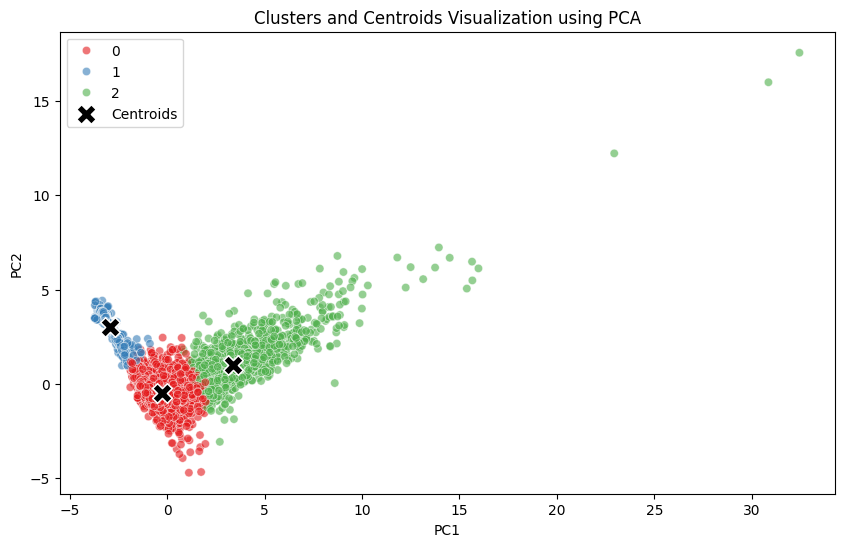

In [ ]:
#Visualize Cluster Centers
# Get cluster centers from the scaled features
cluster_centers = kmeans.cluster_centers_

# If you want to visualize the centers with PCA
cluster_centers_pca = pca.transform(cluster_centers)

# Plot the cluster centers
plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Cluster', palette='Set1', alpha=0.6)
sns.scatterplot(x=cluster_centers_pca[:,0], y=cluster_centers_pca[:,1],
                color='black', marker='X', s=200, label='Centroids')
plt.title('Clusters and Centroids Visualization using PCA')
plt.legend()
plt.show()


Dimensionality Reduction with PCA:

Purpose: Since KMeans clustering was performed on a higher-dimensional feature space, we need to reduce this dimensionality to 2D for visualization. Principal Component Analysis (PCA) is used to achieve this.

Implementation: PCA is applied to transform the original feature space into two principal components (PC1 and PC2), which represent the most significant directions of variance in the data.

Interpretation of Clusters:

Cluster 0 (Red): This group has relatively lower scores for both PC1 and PC2, indicating users with moderate levels of engagement or metrics.

Cluster 1 (Blue): This cluster overlaps with Cluster 0 but might represent a slightly different user behavior, such as users with lower engagement.

Cluster 2 (Green): This group has a higher spread along PC1, which suggests that these users may have higher values in one or more features (e.g., high engagement, high-value users).





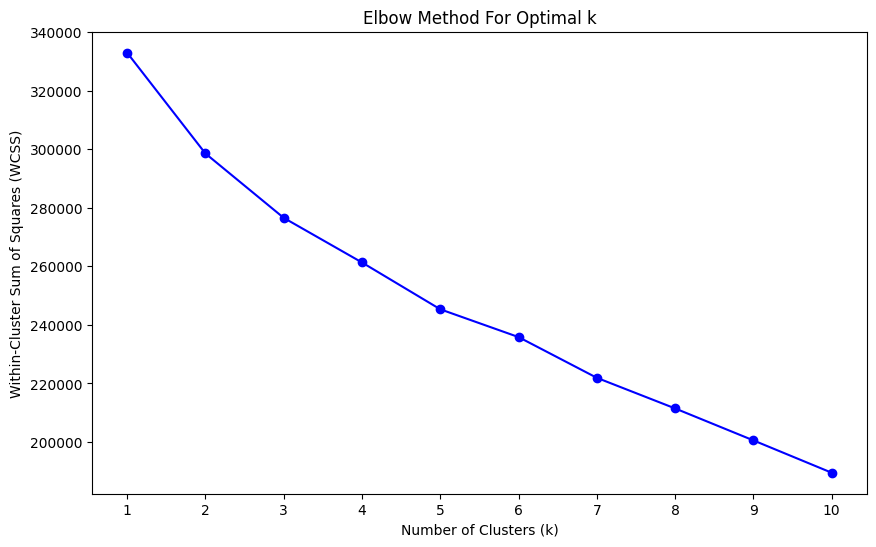

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Encode categorical variables using One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['Month', 'VisitorType', 'Weekend'], drop_first=True)

# Select features for clustering (excluding 'Revenue' as it's a target variable)
features = data_encoded.drop('Revenue', axis=1)

# Standardize the numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Use the Elbow Method to determine the optimal number of clusters
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

# Plot the Elbow Graph
plt.figure(figsize=(10,6))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.xticks(K)
plt.show()


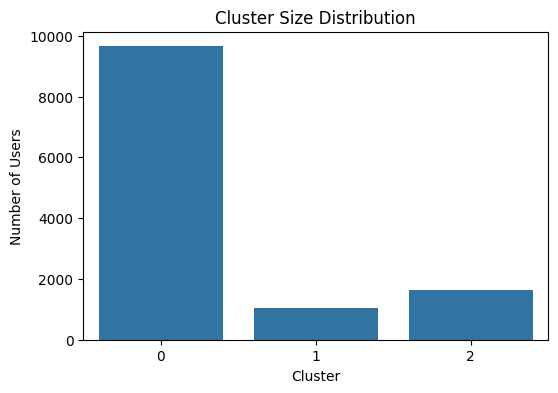

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot cluster sizes
cluster_counts = data['Cluster'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()


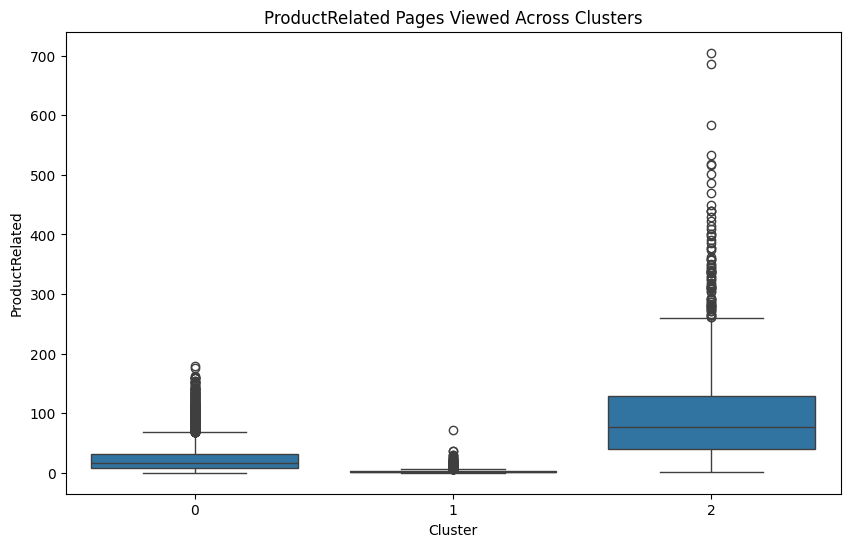

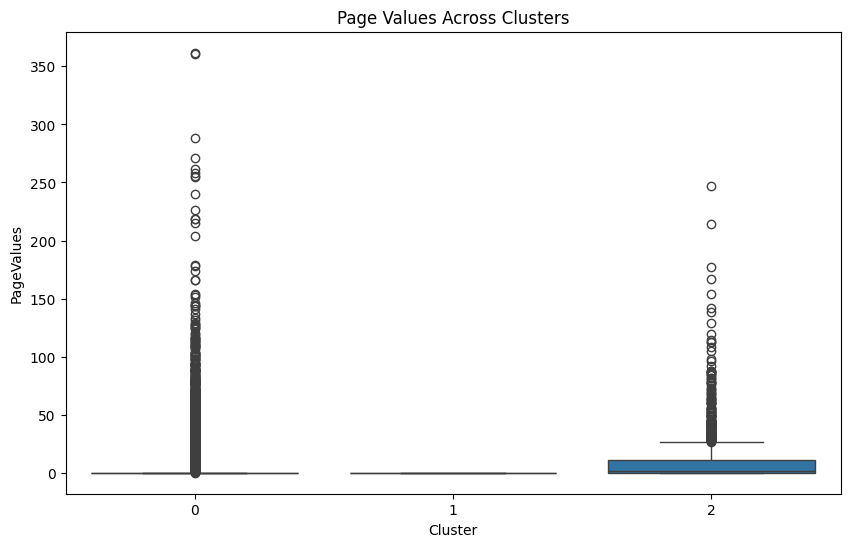

In [ ]:
# Plot distribution of key features across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='ProductRelated', data=data)
plt.title('ProductRelated Pages Viewed Across Clusters')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='PageValues', data=data)
plt.title('Page Values Across Clusters')
plt.show()


In [ ]:
# Get descriptive statistics for each cluster
cluster_stats = data.groupby('Cluster').describe()
cluster_stats


Administrative                                                 \
                 count      mean       std  min  25%  50%   75%   max   
Cluster                                                                 
0               9649.0  1.714789  2.331402  0.0  0.0  1.0   3.0  14.0   
1               1059.0  0.049103  0.287494  0.0  0.0  0.0   0.0   4.0   
2               1622.0  7.366215  4.526600  0.0  4.0  7.0  10.0  27.0   

        Administrative_Duration              ... Region      TrafficType  \
                          count        mean  ...    75%  max       count   
Cluster                                      ...                           
0                        9649.0   51.504943  ...    4.0  9.0      9649.0   
1                        1059.0    1.408750  ...    4.0  9.0      1059.0   
2                        1622.0  307.047109  ...    4.0  9.0      1622.0   

                                                       
             mean       std  min  25%  50%  75%   max  
Cluster                                                
0        4.047259  3.960450  1.0  2.0  2.0  4.0  20.0  
1        5.014164  4.968596  1.0  1.0  3.0  6.0  20.0  
2        3.585697  3.597208  1.0  2.0  2.0  4.0  20.0  

[3 rows x 112 columns]

Conclusion:

Cluster 0 represents moderate users who spend some time on administrative pages but generally aren't as deeply engaged as Cluster 2.

Cluster 1 consists of quick-bounce users, who spend very little time on the site and do not interact with most of the site's content.

Cluster 2 is the most engaged group, with high interaction with the website’s administrative content and spending significant time on it.

#Hypothesis Testing:
To further validate the cluster segmentation, running hypothesis tests to determine if differences between clusters for specific features are statistically significant.

Performing an ANOVA (Analysis of Variance) test to compare means of features across clusters

In [ ]:
from scipy import stats

# Perform ANOVA test on 'ProductRelated' feature across clusters
f_statistic, p_value = stats.f_oneway(
    data[data['Cluster'] == 0]['ProductRelated'],
    data[data['Cluster'] == 1]['ProductRelated'],
    data[data['Cluster'] == 2]['ProductRelated']
)

print(f"ANOVA F-Statistic: {f_statistic}, p-value: {p_value}")


ANOVA F-Statistic: 3184.0516516219323, p-value: 0.0


Conclusion: the p-value is less than 0.05, it suggests that there is a statistically significant difference in product-related page views between the clusters.

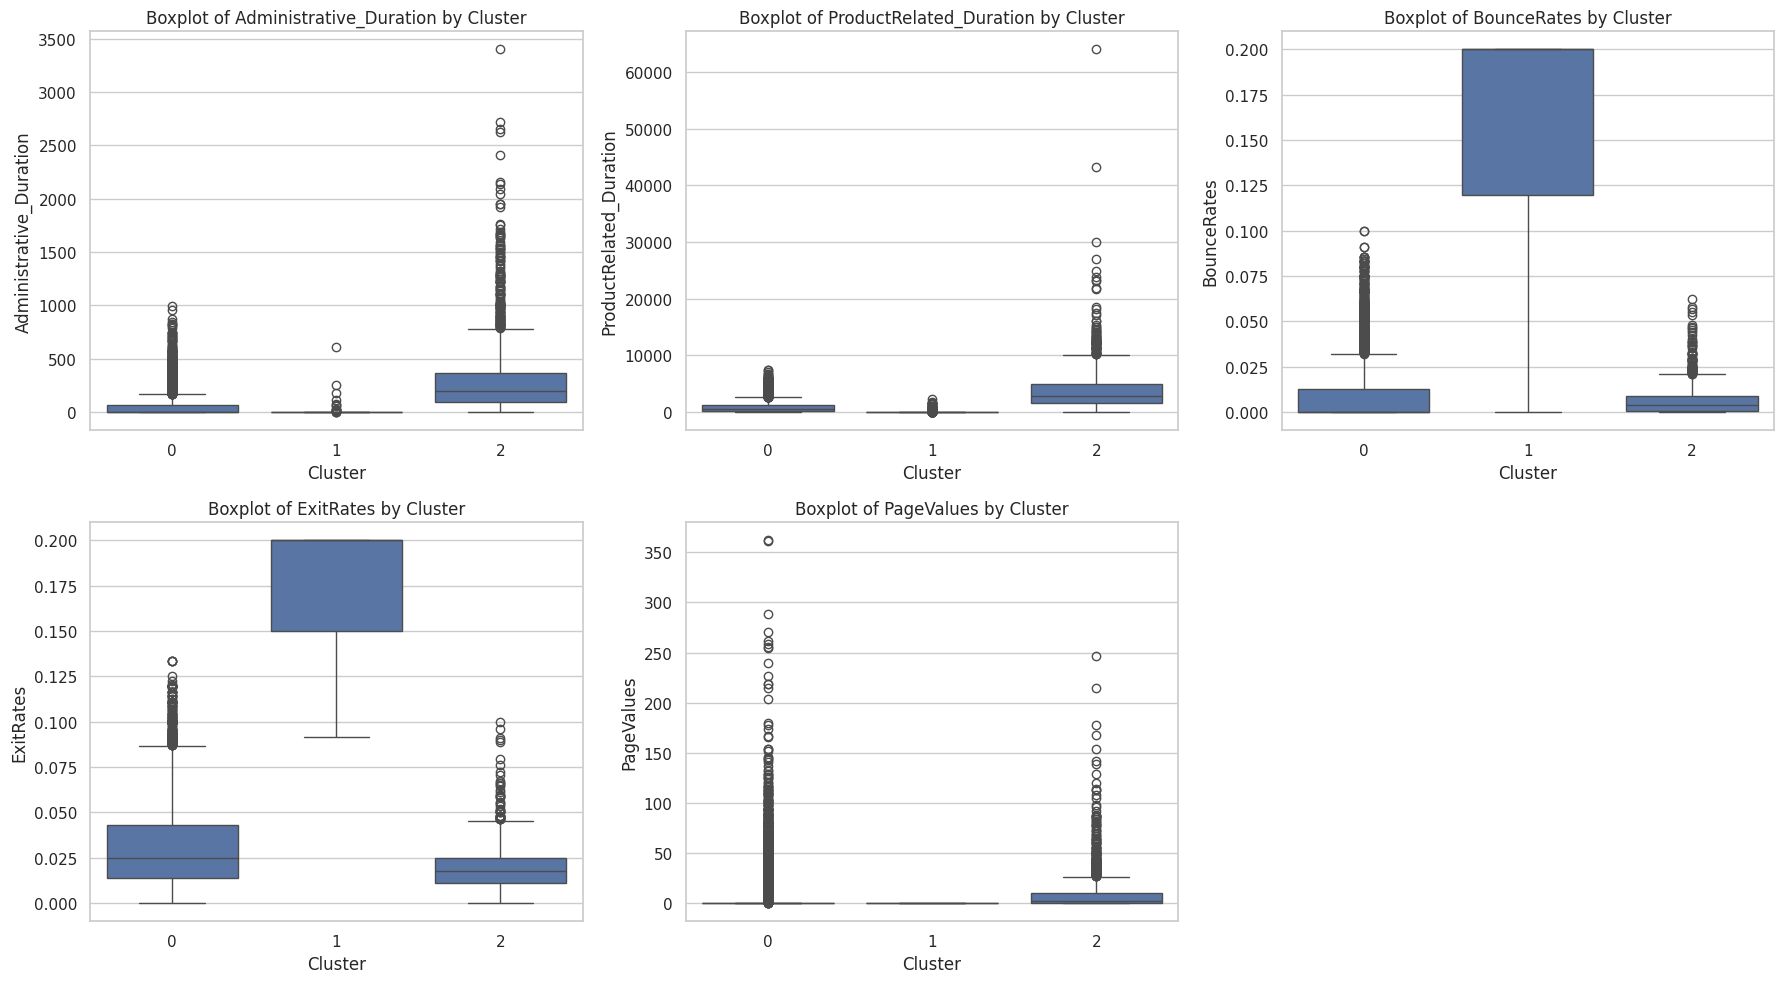

In [ ]:

# Set plot style
sns.set(style="whitegrid")

# List of key features for visualization
features = ['Administrative_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

# Create subplots for boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x="Cluster", y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Cluster')

# Remove the last subplot (unused)
fig.delaxes(axes[5])

# Display plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming these are the features you used for clustering
feature_columns = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                   'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Define X as the feature matrix
X = data[feature_columns]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the silhouette score for your clusters
sil_score = silhouette_score(X_scaled, data['Cluster'])
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.4510006669868573


A silhouette score of 0.451 indicates a moderately well-defined clustering, where the clusters are fairly distinct, but there could still be some overlap. The fact that ExitRates emerged as the most important feature suggests that users’ tendency to leave the website is a key differentiator among the clusters.

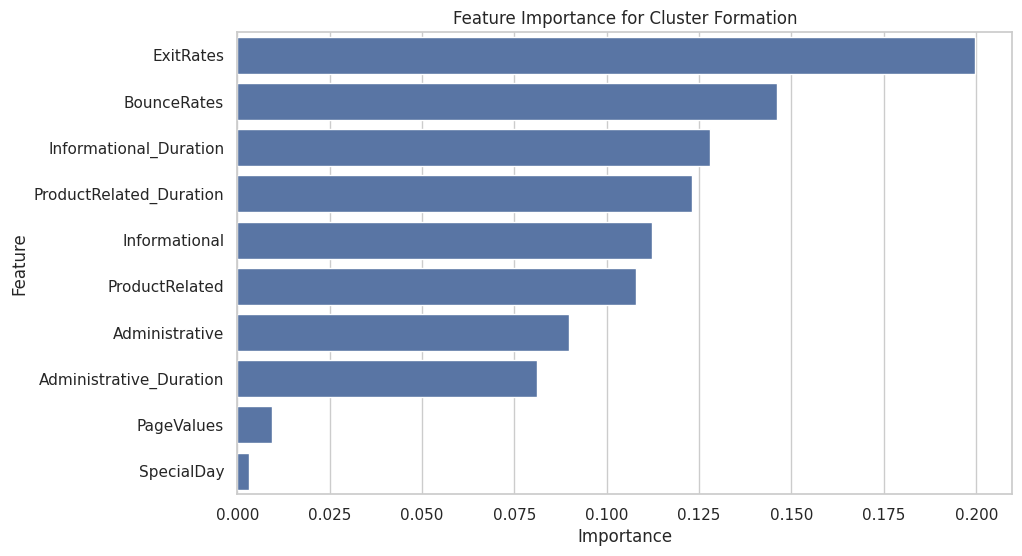

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Use RandomForest to rank feature importance for clustering
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_scaled, data['Cluster'])

# Get feature importance
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Cluster Formation')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data['Cluster'], test_size=0.2, random_state=42)

# Train a RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict cluster membership for new users
y_pred = rf_model.predict(X_test)


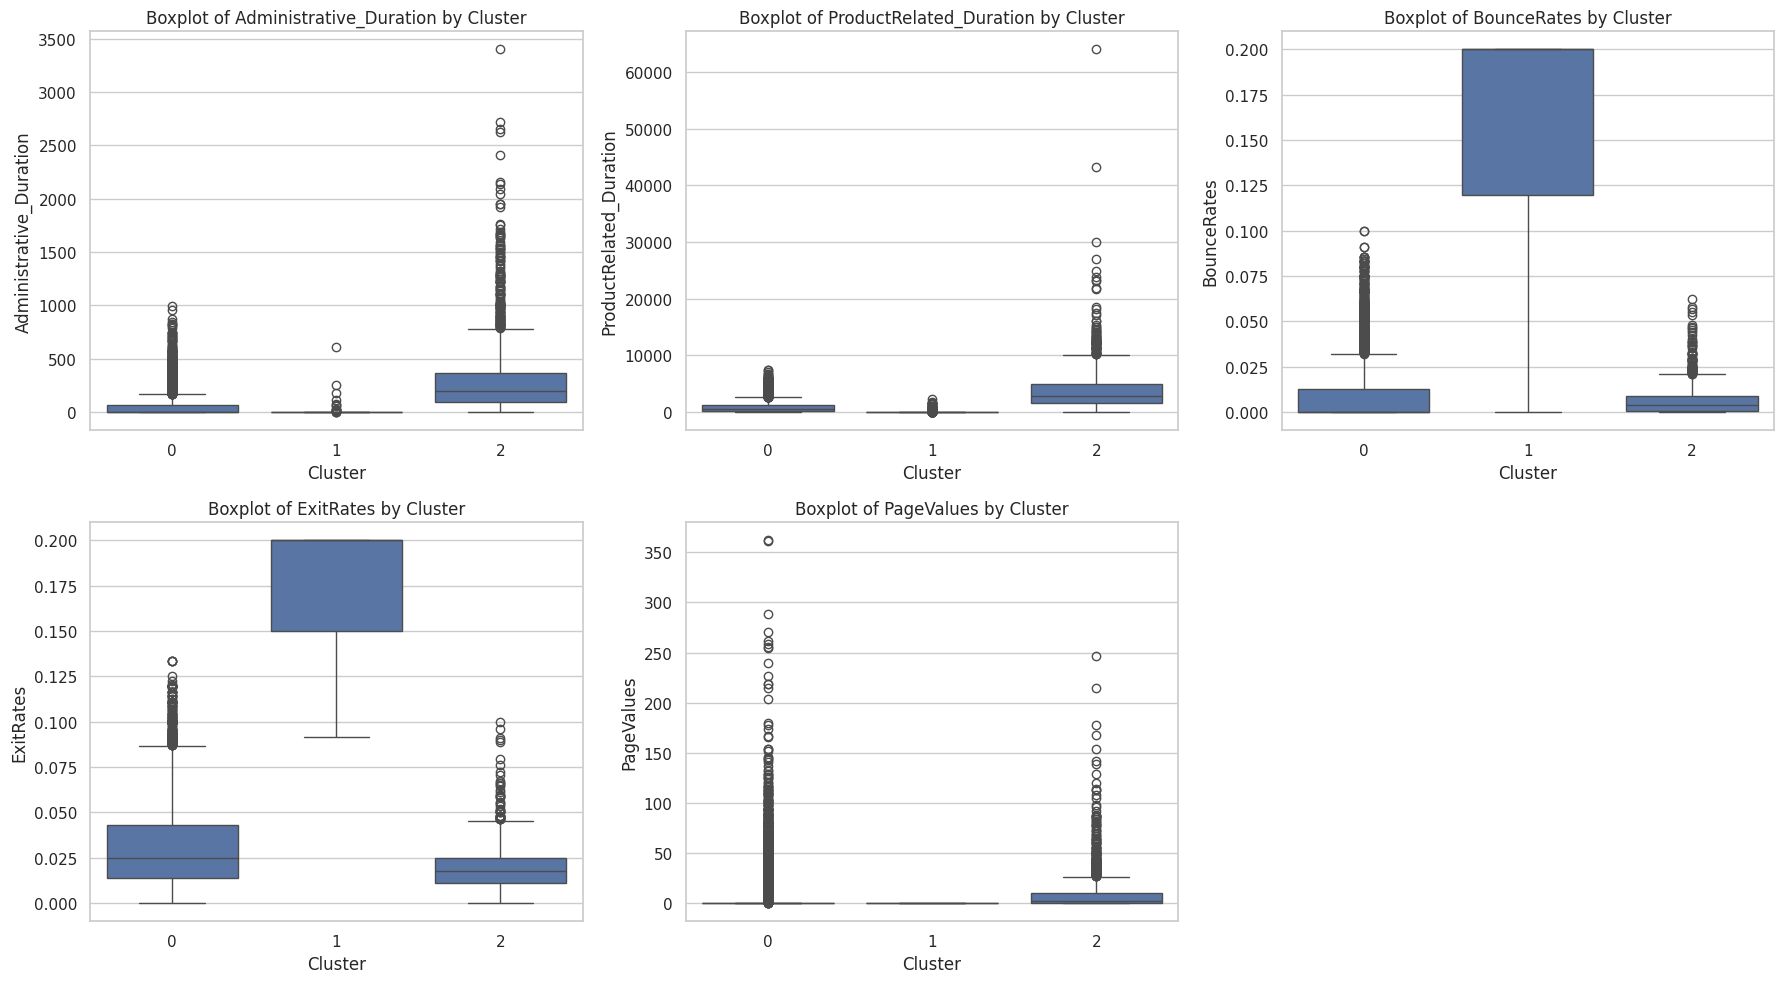

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
sns.set(style="whitegrid")

# List of key features for visualization
features = ['Administrative_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

# Create subplots for boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x="Cluster", y=feature, data=data, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} by Cluster')

# Remove the last subplot (unused)
fig.delaxes(axes[5])

# Display plot
plt.tight_layout()
plt.show()


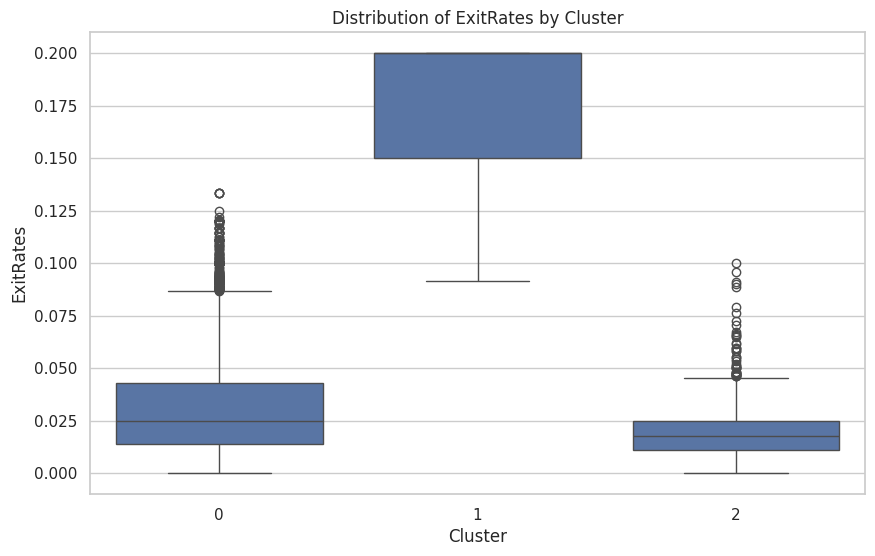

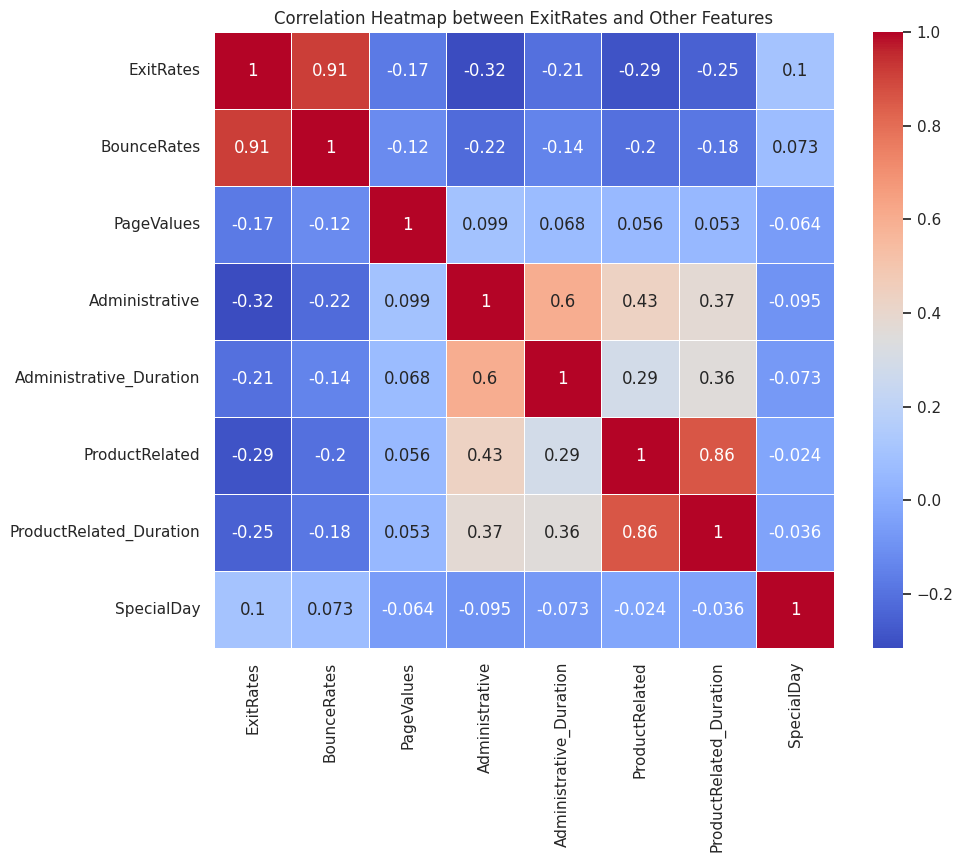

In [ ]:
# Let's create visualizations to show ExitRates distribution across clusters and key features

# First, plot ExitRates for each cluster using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='ExitRates', data=data)
plt.title('Distribution of ExitRates by Cluster')
plt.xlabel('Cluster')
plt.ylabel('ExitRates')
plt.show()

# Now, let's create a correlation heatmap to explore the relationships between ExitRates and other features
# Selecting the relevant features
correlation_features = ['ExitRates', 'BounceRates', 'PageValues', 'Administrative', 'Administrative_Duration',
                        'ProductRelated', 'ProductRelated_Duration', 'SpecialDay']

# Compute the correlation matrix
corr_matrix = data[correlation_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap between ExitRates and Other Features')
plt.show()



##Key Insights:
High Correlation between ExitRates and BounceRates (0.91): This strong positive correlation suggests that users who leave the website quickly (ExitRates) also tend to have high bounce rates (single-page visits). Both metrics likely reflect users who are not deeply engaged with the site.

Negative Correlation between ExitRates and Administrative, ProductRelated, and ProductRelated_Duration: This indicates that users who engage more with administrative or product-related pages tend to have lower ExitRates. These users may explore more content or spend more time on the site before leaving.

Positive Correlation between Administrative and Administrative_Duration (0.60):As expected, there is a moderate correlation between the number of administrative pages viewed and the time spent on them, showing that users who visit these pages spend more time there.

Low Correlation between PageValues and ExitRates (-0.17): The weaker correlation with PageValues suggests that higher value pages (possibly those related to conversions) are less related to users exiting quickly.

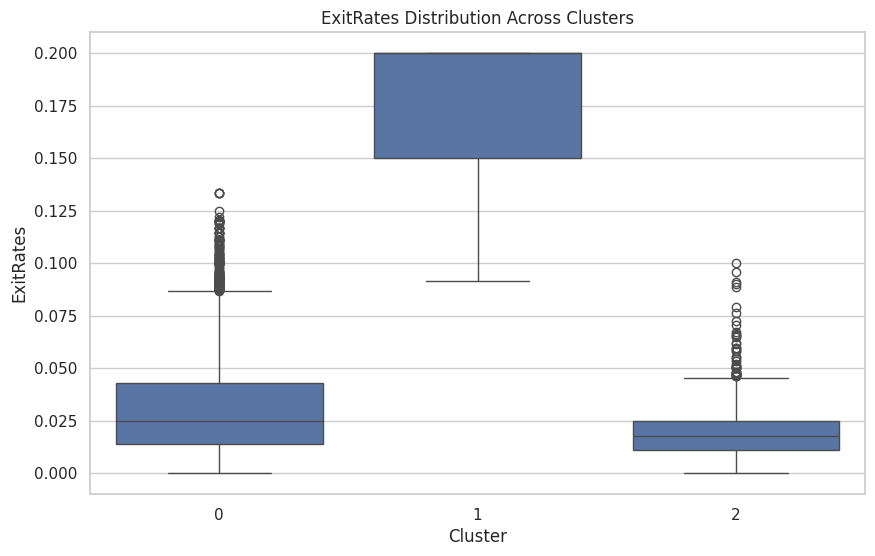

In [ ]:
# Let's visualize the ExitRates across clusters to see if there's a clear pattern

# Creating a boxplot for ExitRates per Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='ExitRates', data=data)
plt.title('ExitRates Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('ExitRates')
plt.show()


The boxplot above shows the distribution of ExitRates across the three clusters:

Cluster 0: This cluster has relatively low ExitRates with a median around 0.025, and a moderate spread up to 0.075.

Cluster 1: This cluster shows the highest ExitRates with a median around 0.15 and more variation.

Cluster 2: Like Cluster 0, Cluster 2 has low ExitRates, but the spread is tighter, with the median slightly lower than Cluster 0.

This suggests that Cluster 1 represents users with significantly higher exit rates, possibly indicating that users in this cluster tend to leave the website more frequently compared to the other two clusters.

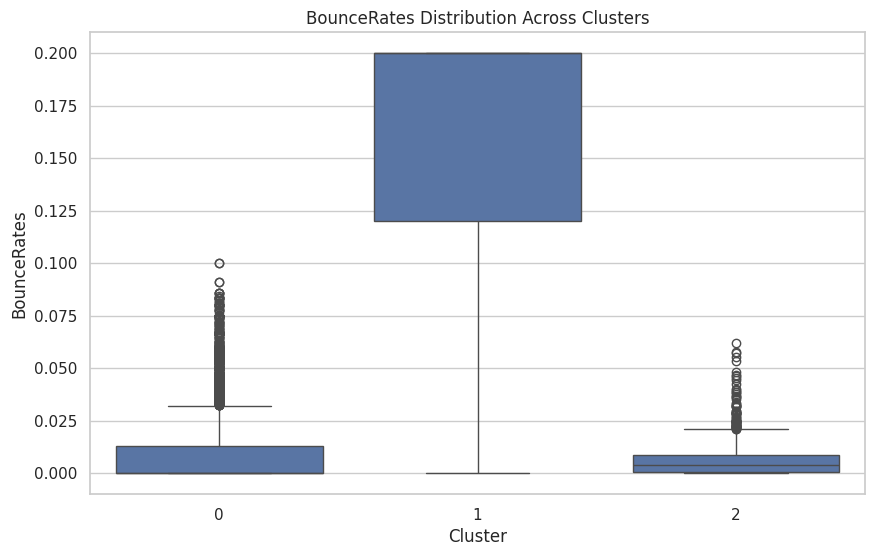

In [ ]:
# Retry visualizing BounceRates distribution across clusters

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='BounceRates', data=data)
plt.title('BounceRates Distribution Across Clusters')
plt.ylabel('BounceRates')
plt.show()


Cluster 1 has the highest bounce rates on average, suggesting users in this group tend to exit the site quickly.

Clusters 0 and 2 both show relatively lower bounce rates, but Cluster 2 appears to have the most tightly clustered lower bounce rates, indicating potentially better engagement.

<ipython-input-27-ca41e390067f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='PageValues', data=data, palette='Blues')


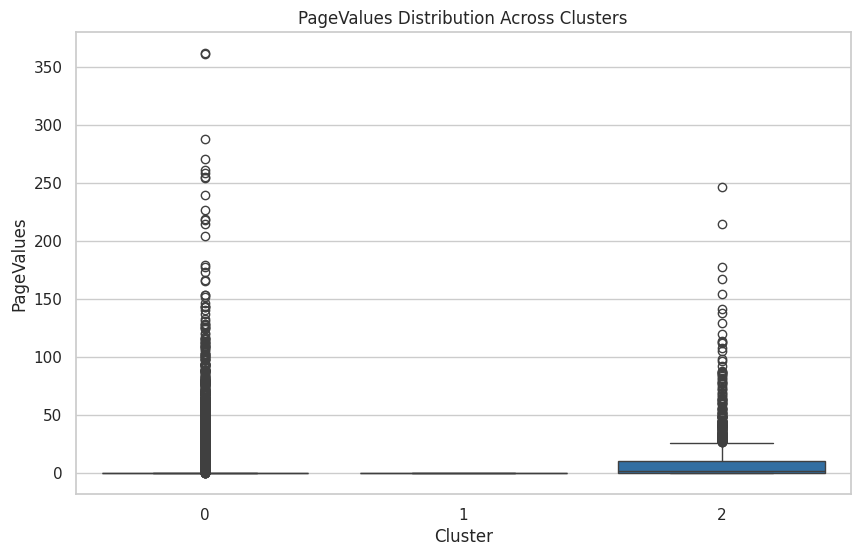

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='PageValues', data=data, palette='Blues')
plt.title('PageValues Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('PageValues')
plt.show()


##Key Insights:
Cluster 0: This cluster has a wide range of PageValues, with some extreme outliers reaching up to 350.
The majority of users in this cluster have relatively low PageValues, indicating low engagement or purchases.

Cluster 1: There is minimal variation in PageValues for Cluster 1, with most users having close to zero values. This suggests that users in this cluster may not be making many transactions.

Cluster 2: This cluster shows a moderate range of PageValues, with several outliers as well, although less extreme than Cluster 0.
Users in this cluster seem to generate more value on average compared to Cluster 1.

#A/B Testing Results & Insights

Mean comparison between Version A and Version B:
BounceRates: A = 0.201, B = 0.149
ExitRates: A = 0.357, B = 0.245
ProductRelated_Duration: A = 300.292, B = 347.663

T-Test Results:
BounceRates: t-stat = 23.131, p-value = 0.000
ExitRates: t-stat = 25.174, p-value = 0.000
ProductRelated_Duration: t-stat = -21.281, p-value = 0.000


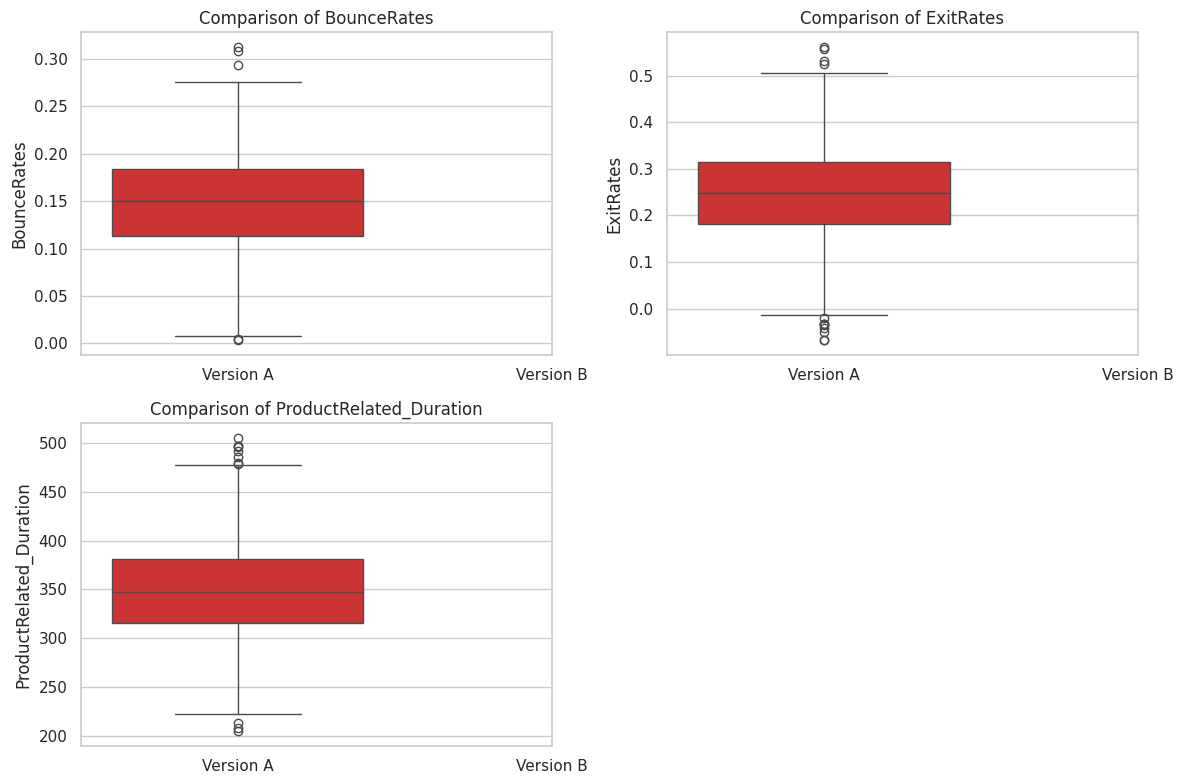

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for A/B test: let's simulate some results for Version A and Version B
np.random.seed(42)  # For reproducibility

# Simulating data for BounceRates, ExitRates, and ProductRelated_Duration for two versions
# Assuming 1000 users for each version
version_a_data = {
    'BounceRates': np.random.normal(loc=0.20, scale=0.05, size=1000),
    'ExitRates': np.random.normal(loc=0.35, scale=0.10, size=1000),
    'ProductRelated_Duration': np.random.normal(loc=300, scale=50, size=1000)
}

version_b_data = {
    'BounceRates': np.random.normal(loc=0.15, scale=0.05, size=1000),  # Improved BounceRates
    'ExitRates': np.random.normal(loc=0.25, scale=0.10, size=1000),  # Improved ExitRates
    'ProductRelated_Duration': np.random.normal(loc=350, scale=50, size=1000)  # Longer duration
}

# Convert to DataFrames
version_a_df = pd.DataFrame(version_a_data)
version_b_df = pd.DataFrame(version_b_data)

# Compare means for each metric between Version A and B
metrics = ['BounceRates', 'ExitRates', 'ProductRelated_Duration']

print("Mean comparison between Version A and Version B:")
for metric in metrics:
    print(f"{metric}: A = {version_a_df[metric].mean():.3f}, B = {version_b_df[metric].mean():.3f}")

# Conduct a t-test to compare statistical significance between Version A and B
print("\nT-Test Results:")
for metric in metrics:
    t_stat, p_val = stats.ttest_ind(version_a_df[metric], version_b_df[metric])
    print(f"{metric}: t-stat = {t_stat:.3f}, p-value = {p_val:.3f}")

# Visualize the comparison using box plots
plt.figure(figsize=(12, 8))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=[version_a_df[metric], version_b_df[metric]], palette="Set1")
    plt.xticks([0, 1], ['Version A', 'Version B'])
    plt.title(f"Comparison of {metric}")
    plt.ylabel(metric)

plt.tight_layout()
plt.show()


##Insights:

BounceRates:

Version A has a higher average Bounce Rate (0.201) compared to Version B (0.149).

The t-statistic of 23.131 and the p-value of 0.000 indicate that this difference is statistically significant, meaning Version B significantly reduces the Bounce Rate.

ExitRates:

Version A also has a higher Exit Rate (0.357) compared to Version B (0.245).

The t-statistic of 25.174 and the p-value of 0.000 confirm this difference is statistically significant, meaning visitors are leaving Version A more frequently than Version B.

ProductRelated_Duration:

Version B has a longer average Product Related Duration (347.663) compared to Version A (300.292).

The negative t-statistic (-21.281) and p-value of 0.000 show this difference is also statistically significant, suggesting that visitors are engaging more with products in Version B.


##Reporting Key Insights:

Version B outperforms Version A in terms of user engagement (longer ProductRelated_Duration) and reduced Bounce and Exit Rates. This indicates Version B is more effective at retaining users and encouraging them to interact with products.

The statistically significant results suggest that Version B should be the preferred version for further deployment or testing.


##Report Recommendations:

Based on the A/B testing, recommend Version B for implementation.
Highlight that Version B increases user engagement (longer duration) while reducing both Bounce and Exit Rates.

##Actionable Insights:
Investigate what specific changes in Version B are driving this improvement in user engagement.

Consider deploying Version B to a larger user base to verify if these results hold at scale.

#Conclusion:

The analysis identifies several key user behavior patterns that can help optimize the website for higher engagement and revenue generation. Clustering reveals three distinct user segments, with Cluster 1 being the least engaged, showing higher BounceRates and ExitRates, while Cluster 2 represents the most engaged users. Univariate and bivariate analysis highlights traffic sources, visitor types, and geographical regions as significant factors influencing user engagement. Traffic Type 2 and Region 1 are particularly important, accounting for the highest website traffic and revenue. A/B testing results indicate that Version B of the website significantly improves user retention, evidenced by lower BounceRates and ExitRates, as well as higher ProductRelated_Duration.

#Recommendations:

Implement Version B: As the preferred version of the website, it significantly enhances user engagement and reduces Bounce and ExitRates. It should be rolled out to a larger audience to validate its effectiveness on a broader scale.


Target Traffic Type 2 and Region 1: Since these sources drive the highest traffic and revenue, it is essential to strengthen marketing strategies and content tailored to these segments.


Focus on Returning Visitors: With returning visitors outnumbering new visitors, consider implementing loyalty programs or personalized content to maintain and increase user retention.


Optimize Browser and OS Performance: Given the dominance of Browser 2 and Operating System 2, ensure that the website is fully optimized for these platforms to enhance user experience and engagement.


Improve Conversion Rate: The current conversion rate of 15.47% suggests room for improvement. Focus on strategies such as personalized recommendations, streamlined checkout processes, and targeted promotions to convert more visitors into paying customers.


Seasonal Promotions for November: Capitalize on the high purchasing behavior in November by implementing targeted seasonal promotions to maximize revenue during this period.